# Plot FRT
- Ruoyi Jiang
- January 20, 2019
- Plotting of repertoire statistics from 10X BCRseq

# Load changeo-O table

In [3]:
library(alakazam)
library(shazam)
library(boot)

library(scales)
library(dplyr)
library(tidyr)

library(RColorBrewer)
source("~/Dropbox/hg/pipeline_abseq/api/saturn/saturn.R")

Loading required package: ggplot2
Loading required package: stringi

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [4]:
PLOT_DIR <- "/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/manuscript/figures"

In [6]:
input_file <- "/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/changeo_public/combined-hc_parse-select_clone-pass_filter-pass_germ-pass.tab"

DF <- readChangeoDb(input_file)

In [7]:
SAMPLES <- unique(DF$SAMPLE)
SAMPLE_COLORS <- c(brewer.pal(name="Paired", n = length(SAMPLES)))
names(SAMPLE_COLORS) <- SAMPLES

# Assign Subsets

In [8]:
readRDS("/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/definitions/190131_JO_bcell.rds") -> all_assign

In [9]:
sapply(readRDS("/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/definitions/190131_JO_bcell_FRT_ident.rds"), function(x) paste0("F", x)) -> v_assign
names(v_assign) <- names(readRDS("/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/definitions/190131_JO_bcell_FRT_ident.rds"))

In [10]:
DF <- DF %>%
    rowwise() %>%
    mutate(SAMPLE_CELL = paste(gsub("_BCR", "", SAMPLE), gsub("-1", "", CELL), sep = '_')) %>%
    mutate(SUBSET = if(grepl("SP", SAMPLE)){all_assign[SAMPLE_CELL]} else{v_assign[SAMPLE_CELL]}) %>%
    filter(!is.na(SUBSET))

Warning message in mutate_impl(.data, dots, caller_env()):
“binding factor and character vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercin

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.data, dots, caller_env()):
“binding character and factor vector, coercing into character vector”Warning message in mutate_impl(.dat

In [11]:
DF <- DF %>%
    mutate(SUBSET = as.character(SUBSET)) %>%
    mutate(SUBSET_CREGION = paste(SUBSET, CREGION)) %>%
    mutate(V_GENE = getGene(V_CALL)) %>%
    mutate(COMPARE = if(grepl("SP", SAMPLE)){"SP_BCR"}else{SAMPLE})

# Analysis

### DTN Analysis to validate cloning threshold

In [12]:
# EXPERIMENT_DIR_S <- "/home/ruoyi/kleinstein/projects/shlomchik_npmice/changeo"

# STATUS_DICT <- c(
#     'GC2' = 'S',
#     'GC3' = 'S',
#     'GC4' = 'S',
#     'K1' = 'S',
#     'L2' = 'S',
#     'L1' = 'S',
#     'GC1' = 'S',
#     'K2' = 'S',
#     'I' = 'I'
# )

# FILE_DICT <- c(
#     'GC2' = file.path(EXPERIMENT_DIR_S, 'RQ2368_GC2_VL_BC10_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'GC3' = file.path(EXPERIMENT_DIR_S, 'RQ2368_GC3_VL_BC11_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'GC4' = file.path(EXPERIMENT_DIR_S, 'RQ2368_GC4_VL_BC12_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'K1' = file.path(EXPERIMENT_DIR_S, 'RQ2368_K1_VL_BC13_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'L2' = file.path(EXPERIMENT_DIR_S, 'RQ2368_L2_VL_BC16_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'L1' = file.path(EXPERIMENT_DIR_S, 'RQ2368_L1_VL_BC15_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'GC1' = file.path(EXPERIMENT_DIR_S, 'RQ2368_GC1_VL_BC9_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'K2' = file.path(EXPERIMENT_DIR_S, 'RQ2368_K2_VL_BC14_Ig_CLIP_mouse-IGH_clone-pass_germ.tab'),
#     'I' = input_file
# )

In [19]:
EXPERIMENT_DIR_S <- "/home/ruoyi/kleinstein/projects/shlomchik_memory/changeo/germ-pass"

STATUS_DICT <- c(
    '1' = 'S',
    '2' = 'S',
    '3' = 'S',
    '4' = 'S',
    '5' = 'S',
    '6' = 'S',
    '9' = 'S',
    'I' = 'I'
)

FILE_DICT <- c(
    file.path(EXPERIMENT_DIR_S, '1DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '2DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '3DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '4DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '5DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '6DP_db-pass_parse-select_germ-pass.tab'),
    file.path(EXPERIMENT_DIR_S, '9DP_db-pass_parse-select_germ-pass.tab'),
    "/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/changeo_public/combined-hc_parse-select_clone-pass_filter-pass_germ-pass.tab"
)

names(FILE_DICT) <- names(STATUS_DICT)

In [20]:
DF_DICT <- list()

for(sample in names(STATUS_DICT)){
    
    #read table and add SAMPLE and STATUS info
    sample_df <- readChangeoDb(FILE_DICT[sample])
    sample_df$STATUS <- STATUS_DICT[sample]
    cat(dim(sample_df), '\n')
    #add to the dict
    DF_DICT[[sample]] <- sample_df
}

Warning message:
“Duplicated column names deduplicated: 'V_CALL' => 'V_CALL_1' [46]”Warning message:
“Duplicated column names deduplicated: 'V_CALL' => 'V_CALL_1' [46]”

3842 52 
48501 47 
44550 47 
42967 47 
55404 47 
40310 47 
21214 47 
3317 62 


In [21]:
DF_CROSS <- bind_rows(DF_DICT)

In [22]:
DF_CROSS %>%
    group_by(STATUS) %>%
    summarize(COUNT = n())

STATUS COUNT 
1 I        3317
2 S      256788

In [ ]:
# # Calculate DistToNearest using groupby and do
dtn_tab <- DF_CROSS %>%
    group_by(STATUS) %>%
    do(distToNearest(., model="ham", first=FALSE, normalize="len", nproc=1)) %>%
    ungroup() %>%
    do(distToNearest(., model="ham", first=FALSE, normalize="len", cross="STATUS", nproc=1))

In [27]:
# Generate density df
dtn_sum <- dtn_tab %>%
    group_by(STATUS) %>%
    do(data.frame(DENSITY = hist(.$DIST_NEAREST, plot=FALSE, breaks=seq(0,1,by=0.02))$density)) %>%
    mutate(BINS = 1:n()/length(DENSITY), TYPE = 'DTN')

cross_sum <- dtn_tab %>%
    group_by(STATUS) %>%
    do(data.frame(DENSITY = -1 * hist(.$CROSS_DIST_NEAREST, plot=FALSE, breaks=seq(0,1,by=0.02))$density)) %>%
    mutate(BINS = 1:n()/length(DENSITY), TYPE = 'CROSS')

toplot_df <- bind_rows(dtn_sum, cross_sum)

In [28]:
TYPE_COLORS <- c("#000000", "#D3D3D3")
names(TYPE_COLORS) <- unique(toplot_df$TYPE)

Warning message:
“Removed 26 rows containing missing values (position_stack).”

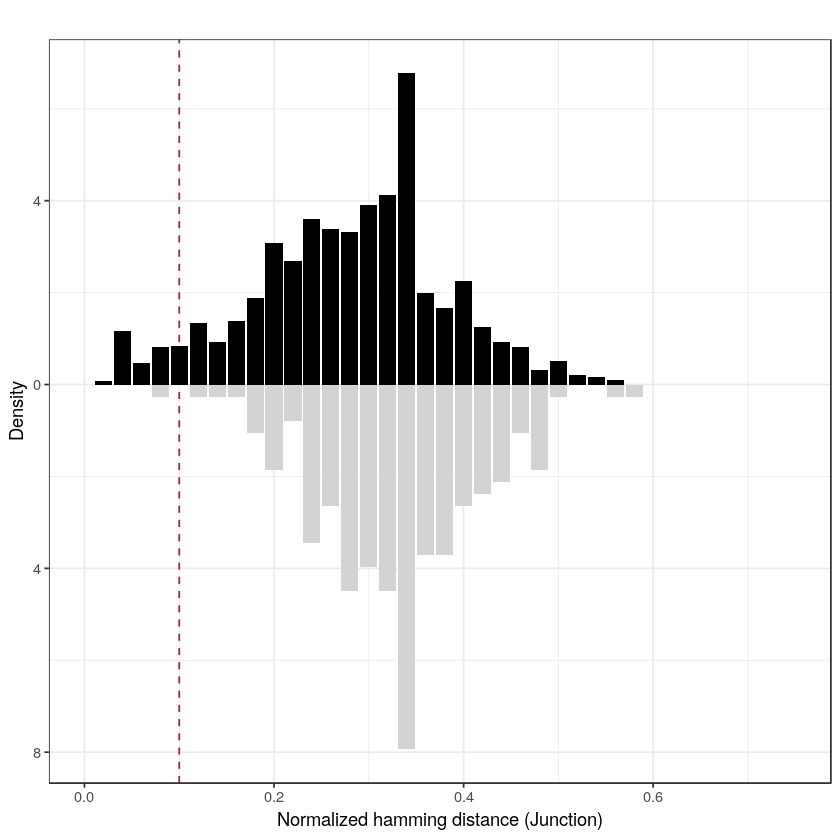

In [29]:
options(plot.repr.width = 5, plot.repr.height=4)

THRESHOLD <- 0.1

p <- ggplot(filter(toplot_df, STATUS == "I"), 
             aes(x=BINS, y=DENSITY, fill=TYPE)) + 
    baseTheme() + 
    theme_bw() + 
    theme(legend.position="none") +
    xlab("Normalized hamming distance (Junction)") + 
    ylab("Density") +
    scale_fill_manual(values=TYPE_COLORS, name="Type") +
    scale_color_manual(values=TYPE_COLORS, name="Type") +
    ggtitle("") +
    geom_vline(xintercept=THRESHOLD, color="firebrick", linetype=2) +
    geom_bar(stat = "identity") +
    scale_x_continuous(limits=c(0,0.75)) +
    scale_y_continuous(labels=abs) 
plot(p)

In [30]:
plotFigure(p, file.path(PLOT_DIR, paste0("dtn", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 3.5, 3)

Warning message:
“Removed 26 rows containing missing values (position_stack).”

png 
  2

In [31]:
svg(file.path(PLOT_DIR, paste0("dtn", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 3.5, 3)
plot(p)
dev.off()

Warning message:
“Removed 26 rows containing missing values (position_stack).”

png 
  2

### Tree Building

In [8]:
TEXT_FIELDS <- c("V_CALL", "J_CALL", "CREGION", "SEQUENCE_ID", "SAMPLE", "CELL", "SUBSET", "SUBSET_CREGION")
NUM_FIELDS <- c("CONSCOUNT", "DUPCOUNT")
SEQ_FIELDS <- c("SEQUENCE_INPUT", "JUNCTION")


# DF_COLLAPSE <- collapseDuplicates(DF, id = "SEQUENCE_ID", seq = "SEQUENCE_IMGT",
# text_fields = TEXT_FIELDS, num_fields = NUM_FIELDS, seq_fields = SEQ_FIELDS,
# add_count = TRUE, ignore = c("N", "-", ".", "?"), sep = ",",
# verbose = FALSE)

DNAPARS_EXEC <- "/home/ruoyi/kleinstein/unpackage/phylip-3.696/exe/dnapars"

#fields for summarizing
TEXT_FIELDS <- c("V_CALL", "J_CALL", "CREGION", "SEQUENCE_ID", "SAMPLE", "CELL", "SUBSET", "SUBSET_CREGION")
NUM_FIELDS <- c("DUPCOUNT", "CONSCOUNT")
SEQ_FIELDS <- c("JUNCTION")

In [118]:
span_clones <- DF %>%
    group_by(CLONE) %>%
    summarize(SPREAD = paste(unique(SAMPLE), collapse = ',')) %>%
    filter(grepl("V", SPREAD), grepl("SP", SPREAD)) %>%
    filter(!(grepl("1", SPREAD)&grepl("2", SPREAD))) %>%
    select(CLONE) %>%
    unlist()

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [10]:
graph_list <- list()

for(clone in span_clones){
        sub_df <- DF %>%
            filter(CLONE == clone)

        
        # Make list of clone objects
        clone_object <- makeChangeoClone(sub_df,
            clone = "CLONE",
            vcall="V_CALL", jcall="J_CALL",
            max_mask=10,
            text_fields=TEXT_FIELDS,
            num_fields=NUM_FIELDS,
            seq_fields=SEQ_FIELDS
        )

        # Make list of graphs
        graph_list[[clone]] <- buildPhylipLineage(clone_object,
                        dnapars_exec=DNAPARS_EXEC, 
                        rm_temp=FALSE)
}

Warning message in buildPhylipLineage(clone_object, dnapars_exec = DNAPARS_EXEC, :
“Clone 1684 was skipped as it does not contain at least 
                2 unique sequences”

In [14]:
GRAPHS <- graph_list
COLORS <- SAMPLE_COLORS

In [15]:
OUT_PATH <- PLOT_DIR
MIN_NODES <- 2

plot_file <- paste0("trees_subset", ".pdf")

pdf(file.path(OUT_PATH, plot_file), 20,10)

# Plot all graphs in sample
for (patient_clone in span_clones) {
    g <- GRAPHS[[patient_clone]]
    
    if(is.null(g)) { next }
    if (vcount(g) < MIN_NODES) { next }
    #if(patient_clone != 3365) {next}
    
    #Vertex color
    V(g)$color <- sapply(V(g)$SAMPLE, function(x)
        if(grepl(",", x)){
            return("#AAAAAA")
        } else {
            return(COLORS[x])
        }
    )                  
    #V(g)$color <- sapply(V(g)$TIME, function(time) return(COLORS[time]))
    V(g)$color[V(g)$name == "Germline"] <- "#000000"
    V(g)$color[grepl("Inferred", V(g)$name)] <- "#FFFFFF"
    
    # Vertex shape
    V(g)$shape <- rep("circle", length(V(g)$name))
    
    V(g)$shape[is.na(V(g)$shape)] <- "circle"
    
    # Vertex text
    uid <- !grepl("Inferred|Germline", V(g)$name)
    #V(g)$label[uid] <- V(g)$SUBSET_CREGION[uid]
    V(g)$label[uid] <- V(g)$SUBSET[uid]
    #V(g)$label[uid] <- V(g)$CREGION[uid]
    #V(g)$label[uid] <- V(g)$CELL[uid]
    V(g)$label[!uid] <- ""       

    # Vertex size
    V(g)$size[!uid] <- 5
    V(g)$size[uid] <- 50 #V(g)$COLLAPSE_COUNT[uid]*50
    
    # Edge labels
    E(g)$label <- E(g)$weight
    
    main <- paste0(g$v_gene, "/", g$j_gene, "/" , g$junc_len, " ", patient_clone)
    
    # Plot graph as a tree
    ly <- layout.reingold.tilford(g, root="Germline", circular=F, flip.y=T)
    plot(g, layout=ly,
         main=main,
         rescale=T,
         edge.arrow.mode=0, 
         vertex.label.family="Helvetica",
         edge.label.color="black", 
         vertex.frame.color="black",
         vertex.label.color="black",
        vertex.label.family="Helvetica")
    
    # Add legend
    legend_colors <- COLORS[names(COLORS) %in% V(g)$SAMPLE]
    legend("topleft", 
           c("Germline", "Inferred", "Mixed", names(legend_colors)),
           fill=c("#000000", "#FFFFFF", "#AAAAAA", legend_colors), 
           bty="n",
           cex=2)
}

dev.off()

png 
  2

# Analysis of single expanded clone

In [16]:
expanded_clone <- DF %>%
    filter(CLONE %in% span_clones) %>%
    group_by(CLONE) %>%
    summarize(COUNT = n()) %>%
    filter(max(COUNT) == COUNT) %>% select(CLONE) %>% unlist()

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [17]:
DF %>%
    filter(CLONE == expanded_clone) %>%
    group_by(SAMPLE, CREGION, SUBSET) %>%
    summarize(COUNT = n()) %>%
    write.csv(file.path(PLOT_DIR, "expanded_clone.csv"))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [18]:
DF %>%
    filter(CLONE == expanded_clone) %>%
    group_by(SAMPLE, CREGION, SUBSET, LIGHT_CLONE) %>%
    summarize(COUNT = n())

Warning message:
“Grouping rowwise data frame strips rowwise nature”

SAMPLE  CREGION SUBSET LIGHT_CLONE COUNT
1 SP1_BCR IGHA    5      400          3   
2 SP1_BCR IGHG2B  0      400          1   
3 SP1_BCR IGHG2B  4      400          1   
4 SP1_BCR IGHG2B  5      400         80   
5 SP1_BCR IGHG2B  6      400          2   
6 SP1_BCR IGHG2B  7      400         16   
7 SP1_BCR IGHG2C  5      400          7   
8 V1_BCR  IGHG2C  F4     400          1

In [19]:
DF %>%
    filter(CLONE == expanded_clone) %>%
    group_by(SAMPLE, CREGION, SUBSET, LIGHT_CLONE) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    summarize(COUNT = sum(COUNT))

Warning message:
“Grouping rowwise data frame strips rowwise nature”

COUNT
1 111

### Figure out the light chain for expanded clone

In [20]:
cells_expanded_clone <- DF %>%
    filter(CLONE == expanded_clone) %>%
    select(CELL) %>%
    unlist()

In [21]:
readChangeoDb('/home/ruoyi/Dropbox/Projects/Iwasaki_FRT/10X/analysis/changeo/combined_igblast_db-pass.tab') %>%
    filter(CELL %in% cells_expanded_clone) %>%
    select(V_CALL, J_CALL, CELL, JUNCTION)

V_CALL                             J_CALL                    
1   IGHV5-17*01                        IGHJ4*01                  
2   IGKV5-39*01                        IGKJ5*01                  
3   IGKV5-39*01                        IGKJ5*01                  
4   IGHV5-17*01                        IGHJ4*01                  
5   IGKV5-39*01                        IGKJ5*01                  
6   IGKV13-57-2*01                     IGHJ2*01,IGHJ2*02,IGHJ2*03
7   IGKV5-39*01                        IGKJ5*01                  
8   IGHV5-17*01                        IGHJ4*01                  
9   IGKV5-39*01                        IGKJ5*01                  
10  IGHV5-17*01                        IGHJ4*01                  
11  IGHV5-17*01                        IGHJ4*01                  
12  IGHV5-17*01                        IGHJ4*01                  
13  IGHV5-17*01                        IGHJ4*01                  
14  IGKV5-39*01                        IGKJ5*01                  
15  IGHV5-17*01                        IGHJ4*01                  
16  IGHV5-17*01                        IGHJ4*01                  
17  IGKV5-39*01                        IGKJ5*01                  
18  IGHV5-17*01                        IGHJ4*01                  
19  IGKV5-39*01                        IGKJ5*01                  
20  IGHV5-17*01                        IGHJ4*01                  
21  IGHV5-17*01                        IGHJ4*01                  
22  IGHV5-17*01                        IGHJ4*01                  
23  IGKV13-57-2*01                     IGHJ2*01,IGHJ2*02,IGHJ2*03
24  IGHV5-17*01                        IGHJ4*01                  
25  IGHV5-17*01                        IGHJ4*01                  
26  IGKV5-39*01                        IGKJ5*01                  
27  IGHV5-17*01                        IGHJ4*01                  
28  IGHV5-17*01                        IGHJ4*01                  
29  IGKV5-39*01                        IGKJ5*01                  
30  IGKV5-39*01                        IGKJ5*01                  
⋮   ⋮                                  ⋮                         
228 IGHV5-17*01                        IGHJ4*01                  
229 IGKV13-57-2*01                     IGHJ2*01,IGHJ2*02,IGHJ2*03
230 IGHV8-11*01,IGHV8-12*01,IGHV8-2*01 IGHJ2*01,IGHJ2*02,IGHJ2*03
231 IGKV5-39*01                        IGKJ5*01                  
232 IGKV5-39*01                        IGKJ5*01                  
233 IGHV5-17*01                        IGHJ4*01                  
234 IGHV5-17*01                        IGHJ4*01                  
235 IGKV5-39*01                        IGKJ5*01                  
236 IGHV2-7*01                         IGHJ4*01                  
237 IGHV5-17*01                        IGHJ4*01                  
238 IGKV14-126*01                      IGHJ3*01,IGHJ3*02         
239 IGHV5-17*01                        IGHJ4*01                  
240 IGHV5-17*01                        IGHJ4*01                  
241 IGHV5-17*01                        IGHJ4*01                  
242 IGKV5-39*01                        IGKJ5*01                  
243 IGKV5-39*01                        IGKJ5*01                  
244 IGKV5-39*01                        IGKJ5*01                  
245 IGKV5-39*01                        IGKJ5*01                  
246 IGHV5-17*01                        IGHJ4*01                  
247 IGKV5-39*01                        IGKJ5*01                  
248 IGKV13-57-2*01                     IGHJ2*01,IGHJ2*02,IGHJ2*03
249 IGHV5-17*01                        IGHJ4*01                  
250 IGHV5-17*01                        IGHJ4*01                  
251 IGHV5-17*01                        IGHJ4*01                  
252 IGHV8-11*01,IGHV8-12*01,IGHV8-2*01 IGHJ2*01,IGHJ2*02,IGHJ2*03
253 IGHV5-17*01                        IGHJ4*01                  
254 IGKV14-126*01                      IGHJ3*01,IGHJ3*02         
255 IGKV13-57-2*01                     IGHJ2*01,IGHJ2*02,IGHJ2*03
256 IGKV5-39*01                        IGKJ5

- TGTTCCCTCAACTGGGAGGGGGATTACTATGCTATGGACTACTGG
- CSLNWEGDYYAMDYW
- IGHV5-17*01
- IGHJ4*01


- TGTCAAAATGGTCACAGCTTTCCGCTCACGTTC
- CQNGHSFPLTF
- IGKV5-39*01
- IGKJ5*01

In [22]:
### Check to see if restricting the light chain removes clone members (ie do any members of the clone not have the light chain?)
DF %>%
    filter(CLONE == expanded_clone) %>%
    group_by(SAMPLE, CREGION, SUBSET, LIGHT_CLONE) %>%
    summarize(COUNT = n())

Warning message:
“Grouping rowwise data frame strips rowwise nature”

SAMPLE  CREGION SUBSET LIGHT_CLONE COUNT
1 SP1_BCR IGHA    5      400          3   
2 SP1_BCR IGHG2B  0      400          1   
3 SP1_BCR IGHG2B  4      400          1   
4 SP1_BCR IGHG2B  5      400         80   
5 SP1_BCR IGHG2B  6      400          2   
6 SP1_BCR IGHG2B  7      400         16   
7 SP1_BCR IGHG2C  5      400          7   
8 V1_BCR  IGHG2C  F4     400          1

# Overlap (CLONE)

In [119]:
# By clone
sp_df <- DF %>%
    mutate(OVERLAP = CLONE %in% span_clones) %>%
    filter(grepl("V", SAMPLE)) %>%
    group_by(CLONE, SAMPLE, OVERLAP) %>%
    summarize(CLONE_COUNT=unique(CLONE)) %>%
    group_by(SAMPLE, OVERLAP) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    group_by(SAMPLE) %>%
    mutate(FREQ = COUNT/sum(COUNT)) %>%
    mutate(PERC = scales::percent(FREQ)) %>%
    rowwise() %>%
    mutate(IDENTITY = if(OVERLAP){"Splenic"}else{"FRT"})

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [120]:
sp_df

SAMPLE OVERLAP COUNT FREQ       PERC  IDENTITY
1 V1_BCR FALSE   120   0.97560976 97.6% FRT     
2 V1_BCR  TRUE     3   0.02439024 2.4%  Splenic 
3 V2_BCR FALSE    45   1.00000000 100%  FRT

In [121]:
SAMPLES <- unique(sp_df$IDENTITY)
COLORS <- c(brewer.pal(name="Paired", n = length(SAMPLES)))
names(COLORS) <- SAMPLES

Warning message in brewer.pal(name = "Paired", n = length(SAMPLES)):
“minimal value for n is 3, returning requested palette with 3 different levels
”

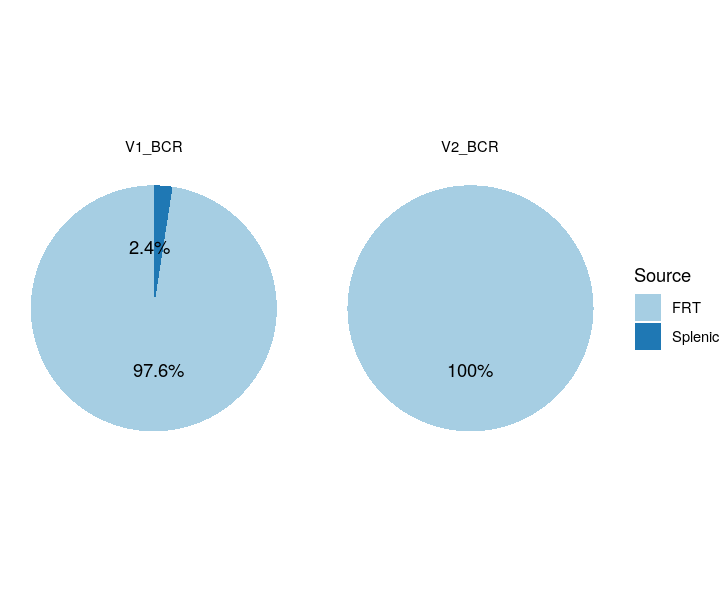

In [122]:
options(repr.plot.width=6, repr.plot.height=5)

p <- ggplot(data=sp_df)+
  geom_bar(aes(x=factor(1), y=FREQ, fill=IDENTITY), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  scale_fill_manual(name="Source", values=COLORS) +
  geom_text(aes(x=factor(1), y=FREQ, label = PERC), position = position_stack(vjust = 0.5))+
  facet_grid(. ~SAMPLE)
plot(p)

In [123]:
plotFigure(p, file.path(PLOT_DIR, paste0("clone-frt-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 4, 2.5)

png 
  2

In [124]:
svg(file.path(PLOT_DIR, paste0("clone-frt-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 4, 2.5)
plot(p)
dev.off()

png 
  2

In [125]:
# By clone
sp_df <- DF %>%
    mutate(OVERLAP = CLONE %in% span_clones) %>%
    filter(grepl("V", SAMPLE)) %>%
    group_by(CLONE, SAMPLE, OVERLAP) %>%
    group_by(SAMPLE, OVERLAP) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    group_by(SAMPLE) %>%
    mutate(FREQ = COUNT/sum(COUNT)) %>%
    mutate(PERC = scales::percent(FREQ)) %>%
    rowwise() %>%
    mutate(IDENTITY = if(OVERLAP){"Splenic"}else{"FRT"})

Warning message:
“Grouping rowwise data frame strips rowwise nature”

In [126]:
SAMPLES <- unique(sp_df$IDENTITY)
COLORS <- c(brewer.pal(name="Paired", n = length(SAMPLES)))
names(COLORS) <- SAMPLES

Warning message in brewer.pal(name = "Paired", n = length(SAMPLES)):
“minimal value for n is 3, returning requested palette with 3 different levels
”

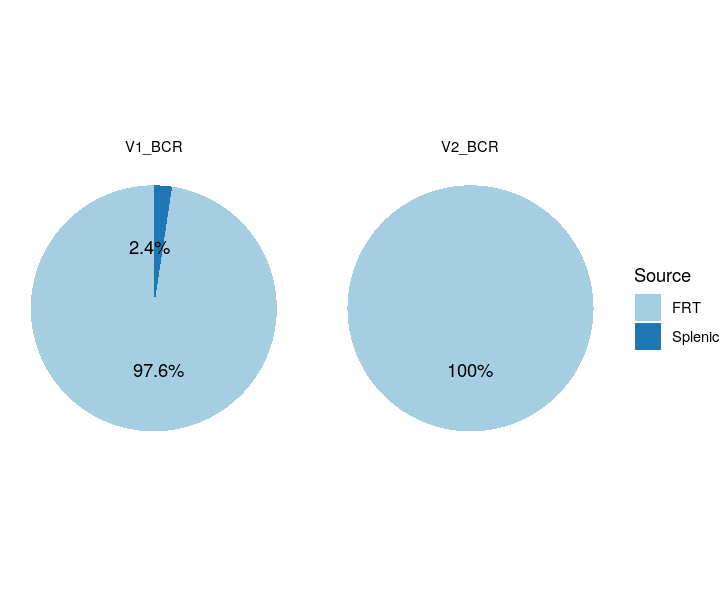

In [127]:
options(repr.plot.width=6, repr.plot.height=5)

p <- ggplot(data=sp_df)+
  geom_bar(aes(x=factor(1), y=FREQ, fill=IDENTITY), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  scale_fill_manual(name="Source", values=COLORS) +
  geom_text(aes(x=factor(1), y=FREQ, label = PERC), position = position_stack(vjust = 0.5))+
  facet_grid(. ~SAMPLE)
plot(p)

In [128]:
plotFigure(p, file.path(PLOT_DIR, paste0("sequence-frt-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 4, 2.5)

png 
  2

In [129]:
svg(file.path(PLOT_DIR, paste0("sequence-frt-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 4, 2.5)
plot(p)
dev.off()

png 
  2

In [138]:
v_df <- DF %>%
    mutate(OVERLAP = CLONE %in% span_clones) %>%
    filter(grepl("SP", SAMPLE)) %>%
    group_by(CLONE, SAMPLE, OVERLAP) %>%
    summarize(CLONE_COUNT=unique(CLONE)) %>%
    group_by(SAMPLE, OVERLAP) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    group_by(SAMPLE) %>%
    mutate(FREQ = COUNT/sum(COUNT)) %>%
    mutate(PERC = scales::percent(FREQ)) %>%
    rowwise() %>%
    mutate(IDENTITY = if(OVERLAP){"FRT"}else{"Splenic"})

Warning message:
“Grouping rowwise data frame strips rowwise nature”

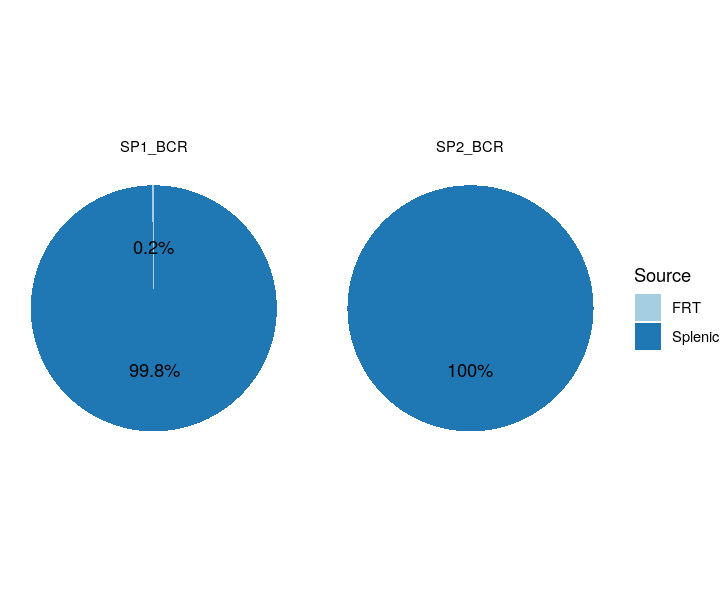

In [139]:
options(repr.plot.width=6, repr.plot.height=5)

p <- ggplot(data=v_df)+
  geom_bar(aes(x=factor(1), y=FREQ, fill=IDENTITY), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  scale_fill_manual(name="Source", values=COLORS) +
  geom_text(aes(x=factor(1), y=FREQ, label = PERC), position = position_stack(vjust = 0.5))+
  facet_grid(. ~SAMPLE)
plot(p)

In [140]:
plotFigure(p, file.path(PLOT_DIR, paste0("clone-spleen-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 4, 2.5)

png 
  2

In [141]:
svg(file.path(PLOT_DIR, paste0("clone-spleen-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 4, 2.5)
plot(p)
dev.off()

png 
  2

In [142]:
v_df <- DF %>%
    mutate(OVERLAP = CLONE %in% span_clones) %>%
    filter(grepl("SP", SAMPLE)) %>%
    group_by(CLONE, SAMPLE, OVERLAP) %>%
    group_by(SAMPLE, OVERLAP) %>%
    summarize(COUNT = n()) %>%
    ungroup() %>%
    group_by(SAMPLE) %>%
    mutate(FREQ = COUNT/sum(COUNT)) %>%
    mutate(PERC = scales::percent(FREQ)) %>%
    rowwise() %>%
    mutate(IDENTITY = if(OVERLAP){"FRT"}else{"Splenic"})

Warning message:
“Grouping rowwise data frame strips rowwise nature”

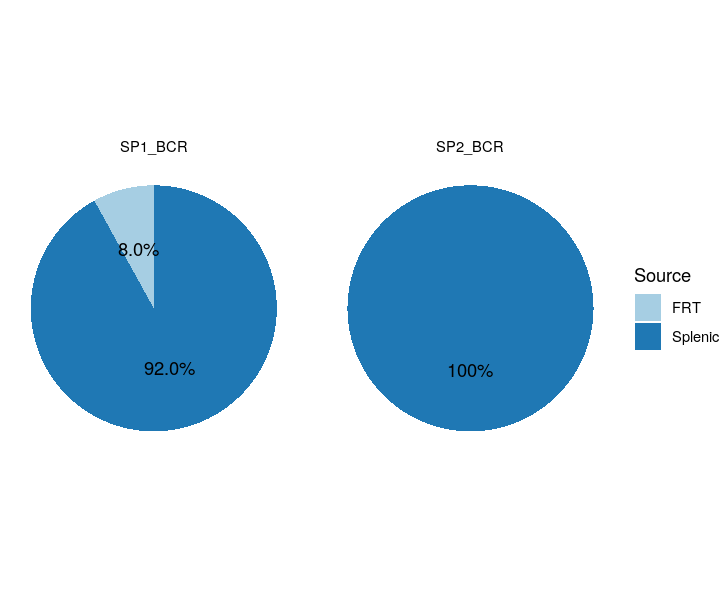

In [143]:
options(repr.plot.width=6, repr.plot.height=5)

p <- ggplot(data=v_df)+
  geom_bar(aes(x=factor(1), y=FREQ, fill=IDENTITY), stat="identity", width = 1)+
  coord_polar("y", start=0)+
  theme_void()+
  scale_fill_manual(name="Source", values=COLORS) +
  geom_text(aes(x=factor(1), y=FREQ, label = PERC), position = position_stack(vjust = 0.5))+
  facet_grid(. ~SAMPLE)
plot(p)

In [144]:
plotFigure(p, file.path(PLOT_DIR, paste0("sequence-spleen-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 4, 2.5)

png 
  2

In [145]:
svg(file.path(PLOT_DIR, paste0("sequence-spleen-overlap", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 4, 2.5)
plot(p)
dev.off()

png 
  2

# Miscellaneous

In [165]:
# TIME_DICT <- c(
# 'SP2_BCR,V2_BCR' = '2',
# 'V1_BCR,SP1_BCR' = '1'
# )

In [166]:
# TIME_COLORS <- c(brewer.pal(name="Dark2", n = length(TIME_DICT)))
# names(TIME_COLORS) <- TIME_DICT

In [167]:
quantiles_95 <- function(x) {
  r <- quantile(x, probs=c(0.05, 0.2, 0.5, 0.8, 0.95))
  names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
return(r)
}

In [168]:
TIME_COLORS <- c(
'1' = '#1B9E77',  
'2' = '#D95F02'
)

In [169]:
COMPARTMENT_DICT <- c(
    'SP1_BCR' = 'SP',
    'SP2_BCR' = 'SP',
    'V1_BCR' = 'V',
    'V2_BCR' = 'V'
)

In [170]:
TIME_DICT <- c(
    'SP1_BCR' = 1,
    'SP2_BCR' = 2,
    'V1_BCR' = 1,
    'V2_BCR' = 2
)

In [171]:
STRATA_DICT <- c(
    'SP1_BCR' = 1,
    'SP2_BCR' = 2,
    'V1_BCR' = 3,
    'V2_BCR' = 4
)

In [172]:
DF_SUBSET <- DF_SUBSET %>%
    mutate(COMPARTMENT = COMPARTMENT_DICT[SAMPLE], TIME = TIME_DICT[SAMPLE]) %>%
    group_by(CLONE) %>%
    mutate(COMPARISON = paste(sort(unique(SAMPLE)), collapse =',')) %>% ungroup()

# Weighted by primary challenge by sequence (post-accept revisions)
- Weight the sampling depth of the re-challenge to that of the primary immunization
- Sample at the same depth as the primary immunization
- Maintain stratified bootstrapping

In [453]:
WEIGHT_DICT <- DF_SUBSET %>%
    mutate(COMPARTMENT = COMPARTMENT_DICT[SAMPLE], TIME = TIME_DICT[SAMPLE]) %>%
    group_by(TIME, COMPARTMENT, SAMPLE) %>%
    summarize(TIME_COUNT = n()) %>%
    group_by(TIME) %>%
    mutate(WEIGHTS = TIME_COUNT/sum(TIME_COUNT)) %>%
    ungroup() %>%
    select(WEIGHTS) %>% unlist()

names(WEIGHT_DICT) <- DF_SUBSET %>%
    mutate(COMPARTMENT = COMPARTMENT_DICT[SAMPLE], TIME = TIME_DICT[SAMPLE]) %>%
    group_by(TIME, COMPARTMENT, SAMPLE) %>%
    summarize(TIME_COUNT = n()) %>%
    group_by(TIME) %>%
    mutate(WEIGHTS = TIME_COUNT/sum(TIME_COUNT)) %>%
    ungroup() %>%
    select(SAMPLE) %>% unlist()

In [454]:
WEIGHT_DICT

SP1_BCR     V1_BCR    SP2_BCR     V2_BCR 
0.91684902 0.08315098 0.95201038 0.04798962

In [455]:
WEIGHT_REWEIGHT_DICT <- c(
'SP1_BCR'=
0.95201037613489,
'V1_BCR'=
0.0479896238651102,
'SP2_BCR'=
0.95201037613489,
'V2_BCR'=
0.0479896238651102
)

In [456]:
DF_SUBSET %>%
    group_by(TIME) %>%
    summarize(COUNT = n())

TIME COUNT
1 1    1828 
2 2    1542

In [457]:
# Set the sampling depth to be the same as primary immunization TIME 2
pre_challenge_depth <- 1542

In [458]:
to_boot <- DF_SUBSET %>%
    ungroup() %>%
    filter(TIME == 1) %>%
    mutate(RESULT = (COMPARISON == 'SP1_BCR,V1_BCR')) %>%
    mutate(STRATA = SAMPLE_DICT[SAMPLE])

weights <- to_boot %>% mutate(WEIGHTS = WEIGHT_REWEIGHT_DICT[SAMPLE]) %>% select(WEIGHTS) %>% unlist()

overlap <- function(DF, idx) {
  return(sum(sample_n(DF[idx,], pre_challenge_depth)$RESULT))
}

b_sequence_weight = boot(to_boot, overlap, R=2000, weights=weights, strata = to_boot$STRATA)

In [459]:
b_sequence_weight


STRATIFIED WEIGHTED BOOTSTRAP


Call:
boot(data = to_boot, statistic = overlap, R = 2000, strata = to_boot$STRATA, 
    weights = weights)


Bootstrap Statistics :
    original  bias    std. error  mean(t*)
t1*      104  9.9775    10.38739  113.9775

In [460]:
ci = boot.ci(b_sequence, type="norm")
ci

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = b_sequence, type = "norm")

Intervals : 
Level      Normal        
95%   ( 90.8, 129.9 )  
Calculations and Intervals on Original Scale

In [461]:
p <- sum(b_sequence$t <= 0)/length(b_sequence$t)
p

[1] 0

In [462]:
mean(b_sequence$t)

[1] 113.635

# Weighted by primary challenge by CLONE (post-accept revisions)
- Weight the sampling depth of the re-challenge to that of the primary immunization
- Sample at the same depth as the primary immunization
- Maintain stratified bootstrapping

In [463]:
# Note grouping by clone
DF_SUBSET_CLONE <- DF_SUBSET %>%
    mutate(RESULT = (COMPARISON == 'SP1_BCR,V1_BCR')) %>%
    mutate(COMPARTMENT = COMPARTMENT_DICT[SAMPLE], TIME = TIME_DICT[SAMPLE]) %>%
    mutate(STRATA = STRATA_DICT[SAMPLE]) %>%
    group_by(STRATA, TIME, COMPARTMENT, CLONE, SAMPLE) %>%
    summarize(RESULT = RESULT[1])

In [464]:
WEIGHT_DICT <- DF_SUBSET_CLONE %>%
    group_by(TIME, COMPARTMENT, SAMPLE) %>%
    summarize(TIME_COUNT = n()) %>%
    group_by(TIME) %>%
    mutate(WEIGHTS = TIME_COUNT/sum(TIME_COUNT)) %>%
    ungroup() %>%
    select(WEIGHTS) %>% unlist()

names(WEIGHT_DICT) <- DF_SUBSET_CLONE %>%
    group_by(TIME, COMPARTMENT, SAMPLE) %>%
    summarize(TIME_COUNT = n()) %>%
    group_by(TIME) %>%
    mutate(WEIGHTS = TIME_COUNT/sum(TIME_COUNT)) %>%
    ungroup() %>%
    select(SAMPLE) %>% unlist()

In [465]:
WEIGHT_DICT

SP1_BCR     V1_BCR    SP2_BCR     V2_BCR 
0.91073583 0.08926417 0.95238095 0.04761905

In [466]:
WEIGHT_REWEIGHT_DICT <- c(
'SP1_BCR'=
0.952380952380952,
'V1_BCR'=
0.0476190476190476,
'SP2_BCR'=
0.952380952380952,
'V2_BCR'=
0.0476190476190476
)

In [467]:
DF_SUBSET_CLONE  %>%
    group_by(TIME) %>%
    summarize(COUNT = n())

TIME COUNT
1 1    1658 
2 2    1491

In [468]:
# Set the sampling depth to be the same as primary immunization TIME 2
pre_challenge_depth <- 1491

In [471]:
to_boot_final <- DF_SUBSET_CLONE %>% ungroup() %>% filter(TIME == 1)

weights <- to_boot_final %>%
    mutate(WEIGHTS = WEIGHT_REWEIGHT_DICT[SAMPLE]) %>% select(WEIGHTS) %>% unlist()

overlap <- function(DF, idx) {
  return(sum(sample_n(DF[idx,], pre_challenge_depth)$RESULT)/2)
}

b_clone = boot(to_boot_final, overlap, R=2000, weights=weights, strata=to_boot_final$STRATA)

In [472]:
mean(b_clone$t)

[1] 2.7225

In [473]:
ci = boot.ci(b_clone, type="norm")
ci

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = b_clone, type = "norm")

Intervals : 
Level      Normal        
95%   ( 0.007,  4.548 )  
Calculations and Intervals on Original Scale

In [474]:
b_clone


STRATIFIED WEIGHTED BOOTSTRAP


Call:
boot(data = to_boot_final, statistic = overlap, R = 2000, strata = to_boot_final$STRATA, 
    weights = weights)


Bootstrap Statistics :
    original  bias    std. error  mean(t*)
t1*      2.5  0.2225     1.15841    2.7225

In [475]:
p <- sum(b_clone$t <= 0)/length(b_clone$t)
p

[1] 0.0025

### Boostrapping for clonal overlap of SP1 and V1 by sequence

In [419]:
STRATA_DICT <- c(
    'SP1_BCR' = 1,
    'SP2_BCR' = 2,
    'V1_BCR' = 3,
    'V2_BCR' = 4
)

In [ ]:
to_boot <- DF_SUBSET %>%
    mutate(RESULT = (COMPARISON == 'SP1_BCR,V1_BCR')) %>%
    mutate(STRATA = STRATA_DICT[SAMPLE])

overlap <- function(DF, idx) {
  return(sum(DF[idx,]$RESULT))
}

b_sequence = boot(to_boot, overlap, R=2000, strata = to_boot$STRATA)

In [72]:
b_sequence


WEIGHTED BOOTSTRAP


Call:
boot(data = to_boot, statistic = overlap, R = 2000, weights = weights)


Bootstrap Statistics :
    original  bias    std. error  mean(t*)
t1*      127   5.716    11.19545   132.716

In [66]:
to_boot <- DF_SUBSET %>%
    mutate(RESULT = (COMPARISON == 'SP1_BCR,V1_BCR')) %>%
    mutate(STRATA = SAMPLE_DICT[SAMPLE])

overlap <- function(DF, idx) {
  return(sum(DF[idx,]$RESULT))
}

b_sequence = boot(to_boot, overlap, R=2000, strata = to_boot$STRATA)

In [65]:
b_sequence


WEIGHTED BOOTSTRAP


Call:
boot(data = to_boot, statistic = overlap, R = 2000, weights = weights)


Bootstrap Statistics :
    original  bias    std. error  mean(t*)
t1*      127   2.905    11.25275   129.905

In [25]:
ci = boot.ci(b_sequence, type="norm")
ci

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = b_sequence, type = "norm")

Intervals : 
Level      Normal        
95%   (105.8, 147.8 )  
Calculations and Intervals on Original Scale

##### Assess significance (non-zero overlap)

In [2092]:
p <- sum(b_sequence$t <= 0)/length(b_sequence$t)
p

[1] 0

In [24]:
mean(b_sequence$t)

[1] 127.1925

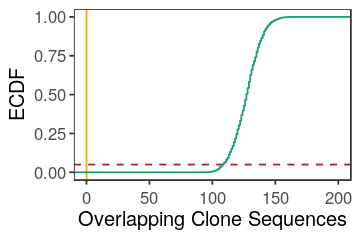

In [2146]:
options(repr.plot.width=3, repr.plot.height=2)

COLORS <- TIME_COLORS
breaks <- pretty(c(0, 180), n=5) 

g <- data.frame(value = b_sequence$t, TIME = '1') %>%
    ggplot(aes(x = value, colour = TIME)) + 
    scale_color_manual(name="Time", values=COLORS) +
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    ylab("ECDF") +
    xlab("Overlapping Clone Sequences") +
    scale_x_continuous(breaks=breaks, limits=c(min(breaks), max(breaks))) +   
    geom_hline(yintercept=0.05, color="firebrick", linetype=2) +
    geom_vline(xintercept=0.00, color="orange", linetype=1) +
    stat_ecdf()
plot(g)

In [2147]:
plotFigure(g, file.path(PLOT_DIR, paste0("bootstrap-ecdf-sequence", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 3, 2)

png 
  2

In [2148]:
svg(file.path(PLOT_DIR, paste0("bootstrap-ecdf-sequence", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 3, 2)
plot(g)
dev.off()

png 
  2

### Boostrapping for clonal overlap of SP1 and V1 by clone

In [476]:
# Note grouping by clone
to_boot <- DF_SUBSET %>%
    ungroup() %>%
    mutate(RESULT = (COMPARISON == 'SP1_BCR,V1_BCR')) %>%
    mutate(STRATA = STRATA_DICT[SAMPLE]) %>%
    group_by(STRATA, CLONE) %>%
    summarize(RESULT = RESULT[1])

# Divide by two given possibility of catching only one member of clone
overlap <- function(DF, idx) {
  return(sum(DF[idx,]$RESULT)/2)
}

# Stratified bootstrapping to acocunt for different bootstrap depths using STRATA
b_clone = boot(to_boot, overlap, R=2000, strata = to_boot$STRATA)

In [477]:
b_clone


STRATIFIED BOOTSTRAP


Call:
boot(data = to_boot, statistic = overlap, R = 2000, strata = to_boot$STRATA)


Bootstrap Statistics :
    original  bias    std. error
t1*        3  -0.005    1.206629

In [478]:
ci = boot.ci(b_clone, type="norm")
ci

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 2000 bootstrap replicates

CALL : 
boot.ci(boot.out = b_clone, type = "norm")

Intervals : 
Level      Normal        
95%   ( 0.64,  5.37 )  
Calculations and Intervals on Original Scale

##### Assess significance (non-zero overlap)

In [479]:
p <- sum(b_clone$t <= 0)/length(b_clone$t)
p

[1] 0.0015

In [480]:
mean(b_clone$t)

[1] 2.995

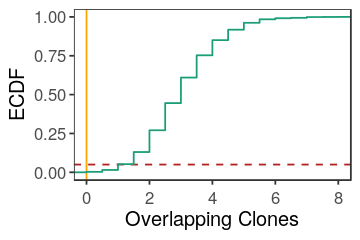

In [2149]:
options(repr.plot.width=3, repr.plot.height=2)

COLORS <- TIME_COLORS
breaks <- pretty(c(0, 8), n=5) 

g <- data.frame(value = b_clone$t, TIME = '1') %>%
    ggplot(aes(x = value, colour = TIME)) + 
    scale_color_manual(name="Time", values=COLORS) +
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    ylab("ECDF") +
    xlab("Overlapping Clones") +
    scale_x_continuous(breaks=breaks, limits=c(min(breaks), max(breaks))) +  
    geom_hline(yintercept=0.05, color="firebrick", linetype=2) +
    geom_vline(xintercept=0.00, color="orange", linetype=1) +
    stat_ecdf()
plot(g)

In [2150]:
plotFigure(g, file.path(PLOT_DIR, paste0("bootstrap-ecdf-clone", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 3, 2)

png 
  2

In [2151]:
svg(file.path(PLOT_DIR, paste0("bootstrap-ecdf-clone", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 3, 2)
plot(g)
dev.off()

png 
  2

### CI Plots

In [2156]:
quantiles_95 <- function(x) {
  r <- quantile(x, probs=c(0.05, 0.2, 0.5, 0.8, 0.95))
  names(r) <- c("ymin", "lower", "middle", "upper", "ymax")
  r
}

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

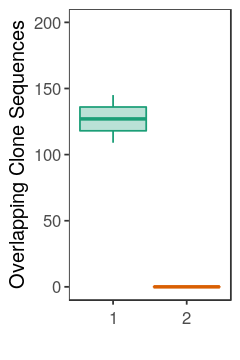

In [2157]:
options(repr.plot.width=2, repr.plot.height=3)

COLORS <- TIME_COLORS
breaks <- pretty(c(0, 180), n=5) 

g <- bind_rows(
    data.frame(value = b_sequence$t, TIME = '1'),
    data.frame(value = 0, TIME = '2'),
    ) %>%
    ggplot(aes(y = value, x = TIME, colour = TIME, fill=TIME)) + 
    #geom_boxplot(alpha = 0.3) +
    stat_summary(fun.data = quantiles_95, geom="boxplot", alpha = 0.3) +
    scale_color_manual(name="Time", values=COLORS) +
    scale_fill_manual(name="Time", values=COLORS) +
    scale_y_continuous(breaks=breaks, limits=c(min(breaks), max(breaks))) +  
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    ylab("Overlapping Clone Sequences") +
    xlab("")
plot(g)

In [2161]:
plotFigure(g, file.path(PLOT_DIR, paste0("bootstrap-ci-sequence", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 2, 3)

png 
  2

In [2162]:
svg(file.path(PLOT_DIR, paste0("bootstrap-ci-sequence", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 2, 3)
plot(g)
dev.off()

png 
  2

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

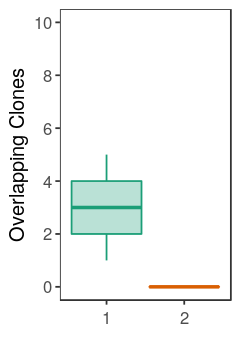

In [2160]:
options(repr.plot.width=2, repr.plot.height=3)

COLORS <- TIME_COLORS
breaks <- pretty(c(0, 10), n=5) 

g <- bind_rows(
    data.frame(value = b_clone$t, TIME = '1'),
    data.frame(value = 0, TIME = '2'),
    ) %>%
    ggplot(aes(y = value, x = TIME, colour = TIME, fill=TIME)) + 
    #geom_boxplot(alpha = 0.3) +
    stat_summary(fun.data = quantiles_95, geom="boxplot", alpha = 0.3) +
    scale_color_manual(name="Time", values=COLORS) +
    scale_fill_manual(name="Time", values=COLORS) +
    scale_y_continuous(breaks=breaks, limits=c(min(breaks), max(breaks))) +  
    baseTheme() +
    theme(legend.position="none", axis.title.x=element_text(size=12), axis.text.x=element_text(size=10), axis.title.y=element_text(size=12), axis.text.y=element_text(size=10), strip.text=element_text(size=12), legend.text=element_text(size=10), legend.title=element_text(size=12)) +
    ylab("Overlapping Clones") +
    xlab("")
plot(g)

In [2163]:
plotFigure(g, file.path(PLOT_DIR, paste0("bootstrap-ci-clone", "_", format(Sys.time(), "%Y-%m-%d"), ".pdf")), 2, 3)

png 
  2

In [2164]:
svg(file.path(PLOT_DIR, paste0("bootstrap-ci-clone", "_", format(Sys.time(), "%Y-%m-%d"), ".svg")), 2, 3)
plot(g)
dev.off()

png 
  2